# Predykcja cen nieruchomości - projekt

## Wczytanie danych

In [71]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [72]:
df = pd.read_csv("data/houseprice.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


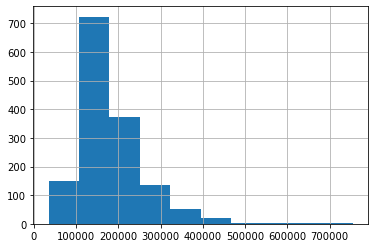

In [73]:
df["SalePrice"].hist();

In [74]:
df["IsExpensive"] = (df["SalePrice"] > 1.5e5).astype(int)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsExpensive
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1


In [75]:
df.IsExpensive.value_counts()

1    841
0    619
Name: IsExpensive, dtype: int64

In [76]:
df.drop(columns=["SalePrice"], inplace=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,IsExpensive
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,1
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,1
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,1
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1

## Feature engineering
- dodaj kolumnę zawierającą informację o tym ile lat ma dom w momencie sprzedaży
- policz stosunek powierzchni działki do powierzchni użytkowej

In [77]:
df.insert(len(df.columns) - 1, "Age", df["YrSold"] - df["YearBuilt"])
df.insert(len(df.columns) - 1, "LotToLivArea", df["LotArea"] / df["GrLivArea"])

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Age,LotToLivArea,IsExpensive
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,5,4.941520,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,31,7.606973,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,7,6.298992,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,91,5.562027,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,8,6.487716,1


## Czyszczenie danych
### Wartości brakujace
- Sprawdź w jakich kolumnach są brakujące wartości
- Usuń brakujące dane według własnego uznania

In [78]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [79]:
df.dropna(axis=1, inplace=True)
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Age,LotToLivArea,IsExpensive
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,5,4.941520,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,31,7.606973,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,7,6.298992,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,91,5.562027,0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,8,6.487716,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,8,4.806922,1
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,32,6.355523,1
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,69,3.864103,1
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,60,9.013915,0


### Niepotrzebne kolumny
- Usuń kolumnę id
- Zlokalizuj zmienne kategoryczne, możemy przyjąć że kolumny kategoryczne to takie, w których liczba unikalnych wartości jest nie większa niż 10. Spośród nich znajdź te, które mają współczynnik gini większy niż 0.6 i wyrzuć je ze zbioru
- Usuń kolumny numeryczne, dla których wartość bezwzględna korelacji z targetem jest mniejsza niż 0.5

**Kolumna Id**

In [80]:
df.drop(columns=["Id"], inplace=True)
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Age,LotToLivArea,IsExpensive
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,5,4.941520,1
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,31,7.606973,1
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,7,6.298992,1
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,91,5.562027,0
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,8,6.487716,1


**Gini index**

In [81]:
df["LandContour"].value_counts()  # nie ma zbyt wielkiego różnicowania ze względu na tą kolumnę

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [82]:
def gini(array):
    
    array = np.array(array).flatten()
    
    if np.amin(array) < 0:
        array -= np.amin(array)
        array = array + 0.0000001
    
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    
    return ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))

In [83]:
cat_columns = [col for col in df.columns if df[col].nunique() < 11]  # liczba unikalnych wartości w kolumnie
cat_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'PavedDrive',
 'PoolArea',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'IsExpensive']

In [84]:
high_gini_cat_columns = [col for col in cat_columns if gini(df[col].value_counts().values) > 0.6]
high_gini_cat_columns

['MSZoning',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'ExterCond',
 'Heating',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Functional',
 'PoolArea',
 'SaleType',
 'SaleCondition']

In [85]:
print(len(high_gini_cat_columns))
print(len(cat_columns))
print(len(df.columns))

20
37
63


In [86]:
df["PoolArea"].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [87]:
df.drop(columns=high_gini_cat_columns, inplace=True)
df

,MSSubClass,LotArea,Street,LotShape,Utilities,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Age,LotToLivArea,IsExpensive
0,60,8450,Pave,Reg,AllPub,CollgCr,7,2003,2003,VinylSd,VinylSd,Gd,PConc,706,0,150,856,Ex,Y,856,854,0,1710,1,2,1,Gd,8,0,2,548,Y,0,61,0,0,0,0,2,2008,5,4.941520,1
1,20,9600,Pave,Reg,AllPub,Veenker,6,1976,1976,MetalSd,MetalSd,TA,CBlock,978,0,284,1262,Ex,Y,1262,0,0,1262,0,2,0,TA,6,1,2,460,Y,298,0,0,0,0,0,5,2007,31,7.606973,1
2,60,11250,Pave,IR1,AllPub,CollgCr,7,2001,2002,VinylSd,VinylSd,Gd,PConc,486,0,434,920,Ex,Y,920,866,0,1786,1,2,1,Gd,6,1,2,608,Y,0,42,0,0,0,0,9,2008,7,6.298992,1
3,70,9550,Pave,IR1,AllPub,Crawfor,7,1915,1970,Wd Sdng,Wd Shng,TA,BrkTil,216,0,540,756,Gd,Y,961,756,0,1717,1,1,0,Gd,7,1,3,642,Y,0,35,272,0,0,0,2,2006,91,5.562027,0
4,60,14260,Pave,IR1,AllPub,NoRidge,8,2000,2000,VinylSd,VinylSd,Gd,PConc,655,0,490,1145,Ex,Y,1145,1053,0,2198,1,2,1,Gd,9,1,3,836,Y,192,84,0,0,0,0,12,2008,8,6.487716,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,Pave,Reg,AllPub,Gilbert,6,1999,2000,VinylSd,VinylSd,TA,PConc,0,0,953,953,Ex,Y,953,694,0,1647,0,2,1,TA,7,1,2,460,Y,0,40,0,0,0,0,8,2007,8,4.806922,1
1456,20,13175,Pave,Reg,AllPub,NWAmes,6,1978,1988,Plywood,Plywood,TA,CBlock,790,163,589,1542,TA,Y,2073,0,0,2073,1,2,0,TA,7,2,2,500,Y,349,0,0,0,0,0,2,2010,32,6.355523,1
1457,70,9042,Pave,Reg,AllPub,Crawfor,7,1941,2006,CemntBd,CmentBd,Ex,Stone,275,0,877,1152,Ex,Y,1188,1152,0,2340,0,2,0,Gd,9,2,1,252,Y,0,60,0,0,0,2500,5,2010,69,3.864103,1
1458,20,9717,Pave,Reg,AllPub,NAmes,5,1950,1996,MetalSd,MetalSd,TA,CBlock,49,1029,0,1078,Gd,Y,1078,0,0,1078,1,1,0,Gd,5,0,1,240,Y,366,0,112,0,0,0,4,2010,60,9.013915,0


**Korelacja**

In [88]:
np.abs(df.corr(numeric_only=True))

,MSSubClass,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Age,LotToLivArea,IsExpensive
MSSubClass,1.000000,0.139781,0.032628,0.027850,0.040581,0.069836,0.065649,0.140759,0.238518,0.251758,0.307886,0.046474,0.074853,0.003491,0.131608,0.177354,0.040380,0.045569,0.040110,0.098672,0.012579,0.006100,0.012037,0.043825,0.026030,0.007683,0.013585,0.021407,0.028746,0.234420,0.026077
LotArea,0.139781,1.000000,0.105806,0.014228,0.013788,0.214103,0.111170,0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.126031,0.014259,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,0.018340,0.020423,0.043160,0.038068,0.001205,0.014261,0.014832,0.890946,0.186260
OverallQual,0.032628,0.105806,1.000000,0.572323,0.550684,0.239666,0.059119,0.308159,0.537808,0.476224,0.295493,0.030429,0.593007,0.111098,0.550600,0.273458,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,0.113937,0.030371,0.064886,0.031406,0.070815,0.027347,0.572629,0.160629,0.654107
YearBuilt,0.027850,0.014228,0.572323,1.000000,0.592855,0.249503,0.049107,0.149040,0.391452,0.281986,0.010308,0.183784,0.199010,0.187599,0.468271,0.242656,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,0.387268,0.031355,0.050364,0.034383,0.012398,0.013618,0.999036,0.093239,0.544235
YearRemodAdd,0.040581,0.013788,0.550684,0.592855,1.000000,0.128451,0.067759,0.181133,0.291066,0.240379,0.140024,0.062419,0.287389,0.119470,0.439046,0.183331,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,0.193919,0.045286,0.038740,0.010286,0.021490,0.035743,0.590360,0.131711,0.509906
BsmtFinSF1,0.069836,0.214103,0.239666,0.249503,0.128451,1.000000,0.050117,0.495251,0.522396,0.445863,0.137079,0.064503,0.208171,0.649212,0.058543,0.004262,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,0.102303,0.026451,0.062021,0.003571,0.015727,0.014359,0.248483,0.131225,0.222408
BsmtFinSF2,0.065649,0.111170,0.059119,0.049107,0.067759,0.050117,1.000000,0.209294,0.104810,0.097117,0.099260,0.014807,0.009640,0.158678,0.076444,0.032148,0.035227,0.046921,0.038264,0.018227,0.067898,0.003093,0.036543,0.029993,0.088871,0.004940,0.015211,0.031706,0.050422,0.118981,0.010752
BsmtUnfSF,0.140759,0.002618,0.308159,0.149040,0.181133,0.495251,0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.422900,0.288886,0.041118,0.250647,0.051575,0.214175,0.183303,0.005316,0.129005,0.002538,0.020764,0.012579,0.023837,0.034888,0.041258,0.150619,0.107434,0.196157
TotalBsmtSF,0.238518,0.260833,0.537808,0.391452,0.291066,0.522396,0.104810,0.415360,1.000000,0.819530,0.174512,0.033245,0.454868,0.307351,0.323722,0.048804,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,0.095478,0.037384,0.084489,0.018479,0.013196,0.014969,0.391498,0.071970,0.432750
1stFlrSF,0.251758,0.299475,0.476224,0.281986,0.240379,0.445863,0.097117,0.317987,0.819530,1.000000,0.202646,0.014241,0.566024,0.244671,0.380637,0.119916,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,0.065292,0.056104,0.088758,0.021096,0.031372,0.013604,0.282143,0.075109,0.420091


In [89]:
np.abs(df.corr(numeric_only=True)["IsExpensive"]).sort_values(ascending=False)

IsExpensive      1.000000
OverallQual      0.654107
FullBath         0.573233
GarageCars       0.572992
GrLivArea        0.547919
YearBuilt        0.544235
Age              0.544167
YearRemodAdd     0.509906
GarageArea       0.498650
Fireplaces       0.439713
TotalBsmtSF      0.432750
1stFlrSF         0.420091
TotRmsAbvGrd     0.406472
HalfBath         0.341870
2ndFlrSF         0.292694
OpenPorchSF      0.289731
WoodDeckSF       0.264610
BsmtFinSF1       0.222408
BsmtUnfSF        0.196157
LotArea          0.186260
EnclosedPorch    0.137613
BsmtFullBath     0.137031
ScreenPorch      0.134617
MoSold           0.049367
LotToLivArea     0.047001
LowQualFinSF     0.046286
3SsnPorch        0.043155
MSSubClass       0.026077
MiscVal          0.019718
YrSold           0.017798
BsmtFinSF2       0.010752
Name: IsExpensive, dtype: float64

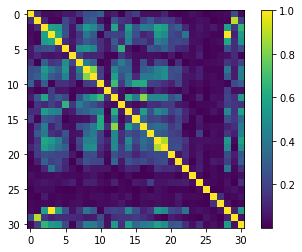

In [90]:
import matplotlib.pyplot as plt

plt.imshow(np.abs(df.corr(numeric_only=True)))
plt.colorbar()

In [91]:
# zamiast pisać: c[c < 0.2] dla c= np.abs(df.corr(numeric_only=True)["IsExpensive"]).sort_values(ascending=False)

columns_to_drop = (c:= np.abs(df.corr(numeric_only=True)["IsExpensive"]).sort_values(ascending=False))[c < 0.2].index

In [92]:
df.drop(columns=columns_to_drop, inplace=True)
df

,Street,LotShape,Utilities,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,Age,IsExpensive
0,Pave,Reg,AllPub,CollgCr,7,2003,2003,VinylSd,VinylSd,Gd,PConc,706,856,Ex,Y,856,854,1710,2,1,Gd,8,0,2,548,Y,0,61,5,1
1,Pave,Reg,AllPub,Veenker,6,1976,1976,MetalSd,MetalSd,TA,CBlock,978,1262,Ex,Y,1262,0,1262,2,0,TA,6,1,2,460,Y,298,0,31,1
2,Pave,IR1,AllPub,CollgCr,7,2001,2002,VinylSd,VinylSd,Gd,PConc,486,920,Ex,Y,920,866,1786,2,1,Gd,6,1,2,608,Y,0,42,7,1
3,Pave,IR1,AllPub,Crawfor,7,1915,1970,Wd Sdng,Wd Shng,TA,BrkTil,216,756,Gd,Y,961,756,1717,1,0,Gd,7,1,3,642,Y,0,35,91,0
4,Pave,IR1,AllPub,NoRidge,8,2000,2000,VinylSd,VinylSd,Gd,PConc,655,1145,Ex,Y,1145,1053,2198,2,1,Gd,9,1,3,836,Y,192,84,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,Reg,AllPub,Gilbert,6,1999,2000,VinylSd,VinylSd,TA,PConc,0,953,Ex,Y,953,694,1647,2,1,TA,7,1,2,460,Y,0,40,8,1
1456,Pave,Reg,AllPub,NWAmes,6,1978,1988,Plywood,Plywood,TA,CBlock,790,1542,TA,Y,2073,0,2073,2,0,TA,7,2,2,500,Y,349,0,32,1
1457,Pave,Reg,AllPub,Crawfor,7,1941,2006,CemntBd,CmentBd,Ex,Stone,275,1152,Ex,Y,1188,1152,2340,2,0,Gd,9,2,1,252,Y,0,60,69,1
1458,Pave,Reg,AllPub,NAmes,5,1950,1996,MetalSd,MetalSd,TA,CBlock,49,1078,Gd,Y,1078,0,1078,1,0,Gd,5,0,1,240,Y,366,0,60,0


### Outliery
Usuń wartości odstające korzystając z kryterium opartego o z-score


In [93]:
from scipy.stats import zscore

zscore_df = np.abs(df.select_dtypes([int, float]).apply(zscore))
zscore_df

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Age,IsExpensive
0,0.651479,1.050994,0.878668,0.575425,0.459303,0.793434,1.161852,0.370333,0.789741,1.227585,0.912210,0.951226,0.311725,0.351000,0.752176,0.216503,1.043259,0.857921
1,0.071836,0.156734,0.429577,1.171992,0.466465,0.257140,0.795163,0.482512,0.789741,0.761621,0.318683,0.600495,0.311725,0.060731,1.626195,0.704483,0.183465,0.857921
2,0.651479,0.984752,0.830215,0.092907,0.313369,0.627826,1.189351,0.515013,0.789741,1.227585,0.318683,0.600495,0.311725,0.631726,0.752176,0.070361,0.977121,0.857921
3,0.651479,1.863632,0.720298,0.499274,0.687324,0.521734,0.937276,0.383659,1.026041,0.761621,0.296763,0.600495,1.650307,0.790804,0.752176,0.176048,1.800676,1.165608
4,1.374795,0.951632,0.733308,0.463568,0.199680,0.045611,1.617877,1.299326,0.789741,1.227585,1.527656,0.600495,1.650307,1.698485,0.780197,0.563760,0.944052,0.857921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.071836,0.918511,0.733308,0.973018,0.238122,0.542435,0.795198,0.250402,0.789741,1.227585,0.296763,0.600495,0.311725,0.060731,0.752176,0.100558,0.944052,0.857921
1456,0.071836,0.222975,0.151865,0.759659,1.104925,2.355701,0.795163,1.061367,0.789741,0.761621,0.296763,2.152216,0.311725,0.126420,2.033231,0.704483,0.150396,0.857921
1457,0.651479,1.002492,1.024029,0.369871,0.215641,0.065656,1.844744,1.569647,0.789741,0.761621,1.527656,2.152216,1.026858,1.033914,0.752176,0.201405,1.073157,0.857921
1458,0.795151,0.704406,0.539493,0.865548,0.046905,0.218982,0.795163,0.832788,1.026041,0.761621,0.934130,0.951226,1.026858,1.090059,2.168910,0.704483,0.775536,1.165608


In [94]:
z= zscore_df.apply(lambda x: x < 3)
z

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Age,IsExpensive
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1456,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1457,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1458,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [95]:
zsum = z.sum(axis=1)
zsum

0       18
1       18
2       18
3       18
4       18
        ..
1455    18
1456    18
1457    18
1458    18
1459    17
Length: 1460, dtype: int64

In [96]:
df = df[zsum == len(z.columns)]
df

,Street,LotShape,Utilities,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,Age,IsExpensive
0,Pave,Reg,AllPub,CollgCr,7,2003,2003,VinylSd,VinylSd,Gd,PConc,706,856,Ex,Y,856,854,1710,2,1,Gd,8,0,2,548,Y,0,61,5,1
1,Pave,Reg,AllPub,Veenker,6,1976,1976,MetalSd,MetalSd,TA,CBlock,978,1262,Ex,Y,1262,0,1262,2,0,TA,6,1,2,460,Y,298,0,31,1
2,Pave,IR1,AllPub,CollgCr,7,2001,2002,VinylSd,VinylSd,Gd,PConc,486,920,Ex,Y,920,866,1786,2,1,Gd,6,1,2,608,Y,0,42,7,1
3,Pave,IR1,AllPub,Crawfor,7,1915,1970,Wd Sdng,Wd Shng,TA,BrkTil,216,756,Gd,Y,961,756,1717,1,0,Gd,7,1,3,642,Y,0,35,91,0
4,Pave,IR1,AllPub,NoRidge,8,2000,2000,VinylSd,VinylSd,Gd,PConc,655,1145,Ex,Y,1145,1053,2198,2,1,Gd,9,1,3,836,Y,192,84,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Pave,Reg,AllPub,Somerst,7,2004,2005,VinylSd,VinylSd,Gd,PConc,410,1221,Ex,Y,1221,0,1221,2,0,Gd,6,0,2,400,Y,0,113,5,1
1455,Pave,Reg,AllPub,Gilbert,6,1999,2000,VinylSd,VinylSd,TA,PConc,0,953,Ex,Y,953,694,1647,2,1,TA,7,1,2,460,Y,0,40,8,1
1456,Pave,Reg,AllPub,NWAmes,6,1978,1988,Plywood,Plywood,TA,CBlock,790,1542,TA,Y,2073,0,2073,2,0,TA,7,2,2,500,Y,349,0,32,1
1457,Pave,Reg,AllPub,Crawfor,7,1941,2006,CemntBd,CmentBd,Ex,Stone,275,1152,Ex,Y,1188,1152,2340,2,0,Gd,9,2,1,252,Y,0,60,69,1


## One hot encoding

In [97]:
text_columns = df.select_dtypes("object").columns
text_columns

Index(['Street', 'LotShape', 'Utilities', 'Neighborhood', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'Foundation', 'HeatingQC', 'CentralAir',
       'KitchenQual', 'PavedDrive'],
      dtype='object')

In [98]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, dtype=int)
encoder.fit_transform(df.select_dtypes("object"))

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1]])

In [99]:
encoder.get_feature_names_out()
# encoder.get_feature_names_out().size

array(['Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'Utilities_AllPub',
       'Utilities_NoSeWa', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Exterior1st_AsbShng',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st

In [100]:
ohe_df = pd.DataFrame(encoder.fit_transform(df.select_dtypes("object")), columns=encoder.get_feature_names_out())
ohe_df

,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Utilities_AllPub,Utilities_NoSeWa,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
2,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
4,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
1355,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
1356,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
1357,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1


In [101]:
df = pd.concat([ohe_df.reset_index(drop=True), df.drop(columns=text_columns).reset_index(drop=True)], axis=1)
df

,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Utilities_AllPub,Utilities_NoSeWa,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,...,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Age,IsExpensive
0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,7,2003,2003,706,856,856,854,1710,2,1,8,0,2,548,0,61,5,1
1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,6,1976,1976,978,1262,1262,0,1262,2,0,6,1,2,460,298,0,31,1
2,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,7,2001,2002,486,920,920,866,1786,2,1,6,1,2,608,0,42,7,1
3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,7,1915,1970,216,756,961,756,1717,1,0,7,1,3,642,0,35,91,0
4,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,8,2000,2000,655,1145,1145,1053,2198,2,1,9,1,3,836,192,84,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,7,2004,2005,410,1221,1221,0,1221,2,0,6,0,2,400,0,113,5,1
1355,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,6,1999,2000,0,953,953,694,1647,2,1,7,1,2,460,0,40,8,1
1356,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,6,1978,1988,790,1542,2073,0,2073,2,0,7,2,2,500,349,0,32,1
1357,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,

## Klasyfikacja

In [109]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X, y = df.drop(columns=["IsExpensive"]), df["IsExpensive"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Regresja logistyczna

In [110]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

accuracy_score(y_test, y_pred)

/home/mdabrowski-phd/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8864142538975501

### Drzewo decyzyjne

In [120]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=6)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

accuracy_score(y_test, y_pred)
# model_dt.feature_importances_

0.8685968819599109

### Naive Bayes

In [122]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

models = [MultinomialNB(), GaussianNB(), BernoulliNB()]
scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    
scores

[0.8106904231625836, 0.8396436525612472, 0.8106904231625836]